In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # or use RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [7]:
df = pd.read_csv('../dataset/forest_fire_dataset_1000.csv')

In [8]:
print(df.head())

   temperature  humidity  wind_speed vegetation_type  elevation  label
0         31.6      34.6        12.8          bamboo        340      0
1         30.7      71.2         6.7           mixed        109      1
2         41.9      59.4         7.2      coniferous        186      0
3         44.7      10.6        23.6       grassland        261      1
4         38.7      28.1         4.2          bamboo        107      0


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temperature      1000 non-null   float64
 1   humidity         1000 non-null   float64
 2   wind_speed       1000 non-null   float64
 3   vegetation_type  1000 non-null   object 
 4   elevation        1000 non-null   int64  
 5   label            1000 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 47.0+ KB
None


In [10]:
print(df.describe())

       temperature     humidity   wind_speed    elevation        label
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean     32.627700    44.808000    13.081900   251.726000     0.259000
std       7.056621    19.761783     6.918315    86.643742     0.438305
min      20.000000    10.000000     1.000000   100.000000     0.000000
25%      26.800000    27.350000     7.000000   176.000000     0.000000
50%      32.700000    44.250000    13.300000   252.000000     0.000000
75%      38.600000    61.400000    18.800000   327.000000     1.000000
max      44.900000    80.000000    25.000000   400.000000     1.000000


In [11]:
df_encoded = pd.get_dummies(df)

In [12]:
df_encoded.head()

,temperature,humidity,wind_speed,elevation,label,vegetation_type_bamboo,vegetation_type_coniferous,vegetation_type_deciduous,vegetation_type_grassland,vegetation_type_mixed
0,31.6,34.6,12.8,340,0,True,False,False,False,False
1,30.7,71.2,6.7,109,1,False,False,False,False,True
2,41.9,59.4,7.2,186,0,False,True,False,False,False
3,44.7,10.6,23.6,261,1,False,False,False,True,False
4,38.7,28.1,4.2,107,0,True,False,False,False,False


In [13]:
X = df_encoded.drop("label", axis=1)
y = df_encoded["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
# sm = SMOTE(random_state=42)
# X_resampled, y_resampled = sm.fit_resample(X_train, y_train)
# model.fit(X_resampled, y_resampled)
model.fit(X, y)
y_pred = model.predict(X_test)

In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cf = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cf)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00        52

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Confusion Matrix:
 [[148   0]
 [  0  52]]


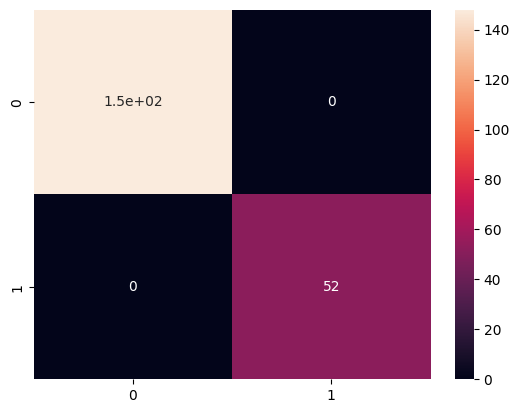

In [15]:
sns.heatmap(cf,annot=True)
plt.show()

In [16]:
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

1.0
1.0
1.0


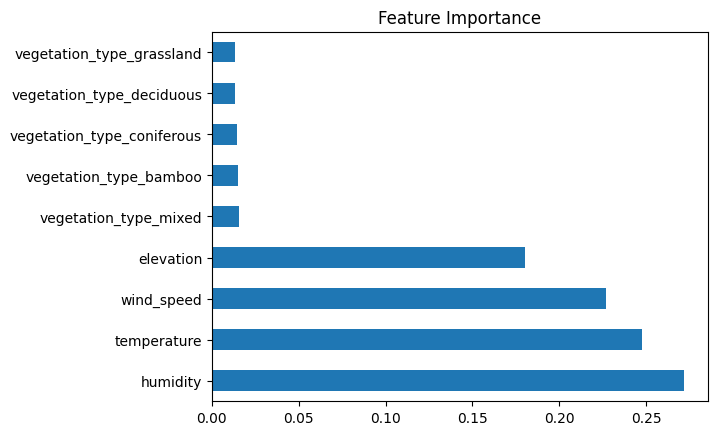

In [17]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importance")
plt.show()

In [21]:
save_path = '../backend/model/fire_predictor.pkl'
os.makedirs(os.path.dirname(save_path), exist_ok=True)

In [ ]:
joblib.dump(model, save_path)

: 

In [ ]:
feature_columns_path = '../backend/model/feature_columns.pkl'
joblib.dump(list(X.columns), feature_columns_path)